# AI Training
## Se trabajan con 4 bases de datos

estas bases de datos contien varios sentimientos

- Kaggle
    - [Dataset1](https://www.kaggle.com/datasets/nelgiriyewithana/emotions/data)
- HugginFace
    - [Dataset2](https://huggingface.co/datasets/LukeGPT88/feelings-text-classifier-eng-dataset)
    - [Dataset3](https://huggingface.co/datasets/imsoumyaneel/sentiment-analysis-llama2)
    - [Dataset4](https://huggingface.co/datasets/Falah/sentiments-dataset-381-classes)


In [1]:
import pandas as pd

### Tratamiento de los datos de cada DATASET, para unificarlo a uno solo


In [2]:
#convertir dos dataset .parquet a .csv
file_path = 'ModelosCSV/HsentimentsL.parquet'
file_path_two = 'ModelosCSV/HsentimentsF.parquet'
convert_df = pd.read_parquet(file_path)
convert_df2 = pd.read_parquet(file_path_two)
file_path_outout = 'ModelosCSV/HsentimentsL.csv'
file_path_outout_two = 'ModelosCSV/HsentimentsF.csv'
convert_df.to_csv(file_path_outout, index=False)
convert_df2.to_csv(file_path_outout_two, index=False)


,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


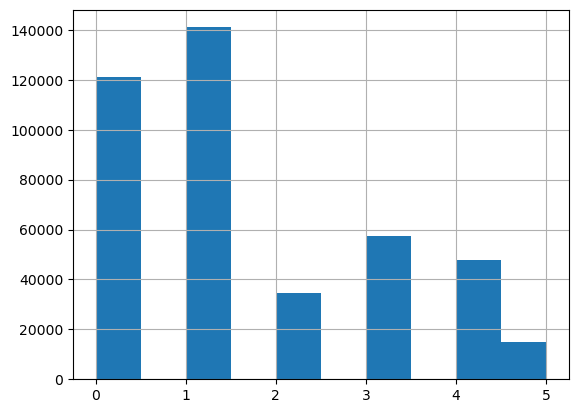

In [3]:
#verificar primer dataset
df1=pd.read_csv('ModelosCSV/Ksentiments.csv')
#contiene 4 columnas dejare solo text and label
df1['label'].hist()
new_df1 = df1[['text','label']]
new_df1.to_csv('ModelosCSV/Ksentimentsconvert.csv', index=False)
df1c=pd.read_csv('ModelosCSV/Ksentimentsconvert.csv')
df1c.head()


| sadness | joy | love | anger | fear | surprise |
|---------|-----|------|-------|------|----------|
| 0       | 1   | 2    | 3     | 4    | 5        |


,text,label
0,This company is all about profit over people.,3
1,"I'm worried about my health, it's a constant f...",4
2,This morning I woke up feeling grateful for ev...,1
3,The thought of not being able to take care of ...,6
4,"I've been having trouble sleeping for weeks, a...",6


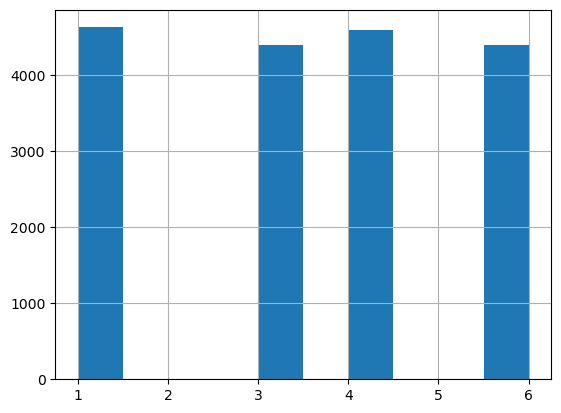

In [4]:
#verificar segundo dataset
df2=pd.read_csv('ModelosCSV/HsentimentsL.csv')
#contiene 4 columnas dejare solo Text and Label_encoding
target_map = {0: 3, 1: 6, 2: 4,3:1}
df2['label'] = df2['Label_encoding'].map(target_map)
df2['label'].hist()
new_df2 = df2[['Text','label']]
new_df2.to_csv('ModelosCSV/HsentimentsLconvert.csv', index=False)
df2c=pd.read_csv('ModelosCSV/HsentimentsLconvert.csv')
df2c = df2c.rename(columns={'Text': 'text'})
df2c.head()


| Anger | Anxiety | Fear | Happiness |
|---------|-----|------|-------|
| 3       | 6  | 4    | 1     | 


Se creo una nueva celda en df2 llamada target en donde siguiera la secuencia del dataset1 df1

,text,label
0,I'll throw out the garbage .,7
1,"So Dick , how about getting some coffee for to...",1
2,"Come on , you can at least try a little , besi...",7
3,What ’ s wrong with that ? Cigarette is the th...,3
4,"Not for me , Dick .",7
...,...,...
598293,You got banned for participating in a brigade.,0
598294,"A joke is subjective pal, second of all you ne...",1
598295,"Well, I'm glad you're out of all that now. How...",1
598296,Everyone likes [NAME].,2


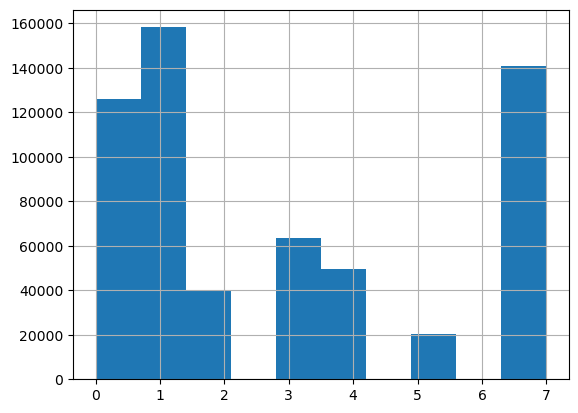

In [5]:
#verificar tercer dataset
df3=pd.read_csv('ModelosCSV/HsentimentsI.csv')
df3.head()
#contiene 4 columnas dejare solo sentence and label
target_map = {'neutral': 7, 'joy': 1, 'anger': 3,'surprise':5, 'sadness': 0,'fear':4,'love':2}
df3['label2'] = df3['label'].map(target_map)
df3['label2'].hist()
df3.head()
new_df3 = df3[['sentence','label2']]
new_df3.to_csv('ModelosCSV/HsentimentsIconvert.csv', index=False)
df3c=pd.read_csv('ModelosCSV/HsentimentsIconvert.csv')
df3c = df3c.rename(columns={'sentence': 'text', 'label2': 'label'})
df3c.head()
df3c

| neutral | joy | anger | surprise | sadness | fear | love |
|---------|-----|------|-------|-----|------|-------|
| 7       | 1  | 3    | 5    |  0  | 4    | 2     | 

In [6]:
#verificar cuarta dataset
df4=pd.read_csv('ModelosCSV/HsentimentsF.csv')
#contiene 4 columnas dejare solo text and sentiment
print(len(df4['sentiment'].unique()))
df4['sentiment'] = df4['sentiment'].str.lower()
sentimientos_unicos = df4['sentiment'].unique()
lista_sentimientos = sentimientos_unicos.tolist()
sentimientos_eliminar = ['sad', 'joyful', 'happy', 'angry', 'surprises', 'anxious', 'neutral', 'positive', 'negative']
for sentimiento in sentimientos_eliminar:
    if sentimiento in lista_sentimientos:
        lista_sentimientos.remove(sentimiento)
target_map = {sentimiento: valor for valor, sentimiento in enumerate(lista_sentimientos, start=9)}
target_map_original = {'sad': 0,'joyfull': 1,'happy': 1,'angry': 3,'surprises':5,'anxious':6,'neutral':7,'positive':8,'negative':9}
target_map.update(target_map_original)
df4['label'] = df4['sentiment'].map(target_map)
df4

new_df4_use = df4[['text','label']]
new_df4_data = df4[['text','sentiment','label']]
new_df4_use.to_csv('ModelosCSV/HsentimentsFconvert.csv', index=False)
new_df4_data.to_csv('ModelosCSV/HsentimentsFconvert_data.csv', index=False)
df4c=pd.read_csv('ModelosCSV/HsentimentsFconvert.csv')
df4


381


,text,sentiment,label
0,I'm overjoyed with the results! My hard work h...,positive,8.0
1,This news broke my heart. I can't believe it's...,negative,9.0
2,I feel ecstatic about the upcoming vacation. C...,positive,8.0
3,Today was just an ordinary day. Nothing specia...,neutral,7.0
4,I'm furious! How could they treat me like that?,negative,9.0
...,...,...,...
1056,"his fighting skills were legendary, making him...",legendary,115.0
1057,the news of his tragic death left the communit...,tragic,160.0
1058,their marriage was a celebration of love and u...,celebratory,90.0
1059,"he embarked on a thrilling travel adventure, e...",thrilling,327.0


### para el Dataset anterior se tienen 381 sentimientos

- lo que se hizo en la anterior celda, fue guardar los datos en dos csv diferentes.
    - el primero, tiene dos culumnas, text y label, las cuales contiene lo que necesitamos para entrenar a la IA.
    - la segunda, contiene text,sentiment,label para tener un orden de a que sentimiento, pertenece cada dato

## dejase solamente 10 sentimientos de los 381 en donde agrupare los sentimientos y los filtrare para que entren a estas 10 categorias 

<Axes: >

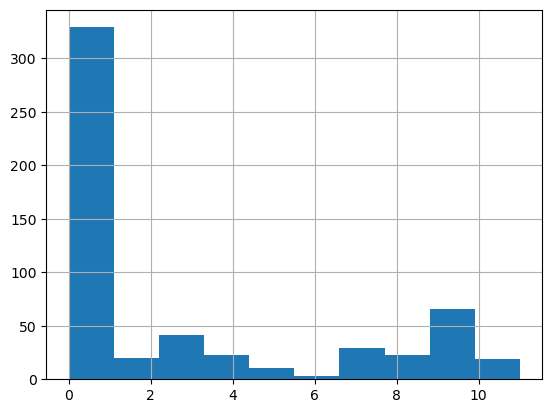

In [9]:
grupos = {
    'sadness': ['sad', 'disappointed','sentiment','frustrated','disillusioned'],
    'joy': ['prideful','vibrant','joyful', 'grateful', 'excited', 'happy', 'relieved', 'positive','delighted', 'moved', 'enchanted', 'peaceful','energized','thrilled', 'enthusiastic', 'promising', 'memorable', 'transformative','engaged',],
    'love': ['love','hopeful','touched', 'proud', 'comforted','appreciative', 'inclusive', 'respectful', 'unity', 'emotional'],
    'fear': ['worried', 'anxious'],
    'anger': ['angry','provoked','outraged'],
    'surprise': ['surprised','amazed','groundbreaking'],
    'anxious' :['anxious','eager','concerned','consumed'],
    'neutral': ['diverse','cultural','validated','neutral', 'indifferent','content','trendy', 'informative'],
    'curious' :['intrigued', 'curious', 'fascinated', 'engrossed','enlightening', 'revealing', 'inspiring'],
    'reflection' :['nostalgic','inspired', 'impressed', 'motivated', 'significant', 'revolutionary', 'optimistic', 'impactful', 'compelling','enthralled'],
    'peacefull':['relaxed','empowered','captivated'],
    'negative':['addicted','controversial','influenced','evocative','negative']
}
df5=pd.read_csv('ModelosCSV/HsentimentsF.csv')
df5
target_map_original = {'sadness': 0,'joy': 1,'happy': 1,'love':2,'anger': 3,'fear':4,'surprise':5,'anxious':6,'neutral':7,'curious':8,'reflection':9,'peacefull':10,'negative':11}
def assign_numeric_value(sentiment):
    for group, values in grupos.items():
        if sentiment.lower() in values:
            return target_map_original[group]
    return None  # Devuelve None si no se encuentra en ningún grupo

# Aplicar la función a la columna 'sentiment' del DataFrame y crear una nueva columna 'label'
df5['label'] = df5['sentiment'].apply(assign_numeric_value)
df_sin_nan = df5.dropna(subset=['label'])
df_sin_nan
new_df5_use = df5[['text','label']]
new_df5_use.to_csv('ModelosCSV/HsentimentsFFilter_sentiments.csv', index=False)
df5c=pd.read_csv('ModelosCSV/HsentimentsFFilter_sentiments.csv')
df5c['label'].hist()

## Union de datasets

<Axes: >

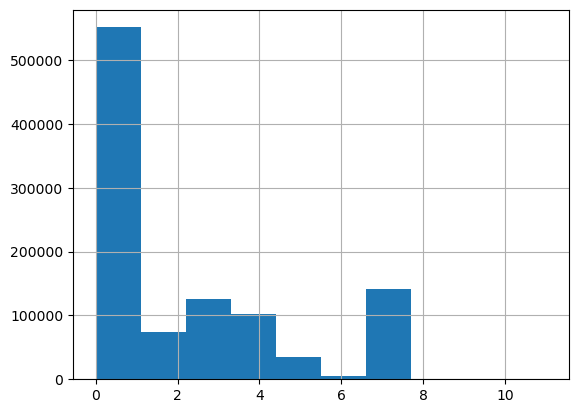

In [10]:
merged_df = pd.concat([df1c, df2c, df3c, df4c], ignore_index=True)
merged_df.to_csv('ModelosCSV/merged_dataset.csv', index=False)
merged_df1 = pd.concat([df1c, df2c, df3c], ignore_index=True)
merged_df1.to_csv('ModelosCSV/merged_dataset1.csv', index=False)

merged_df2 = pd.concat([df1c, df2c, df3c,df5c], ignore_index=True)
merged_df2.to_csv('ModelosCSV/merged_dataset2.csv', index=False)
len(merged_df2)
merged_df2['label'].hist()
#1033129

<Axes: >

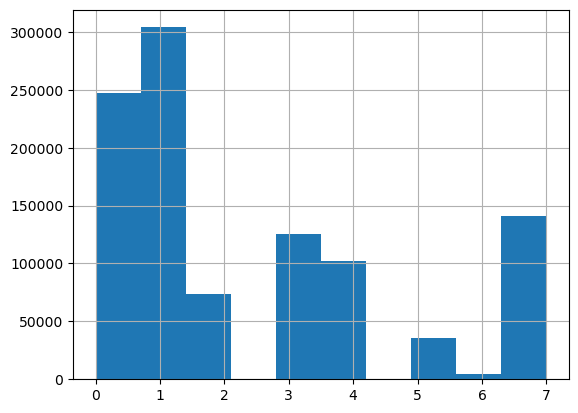

In [11]:
merged_df1['label'].hist()